In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Amazon Sale Report.csv')

C:\Users\siddh\AppData\Local\Temp\ipykernel_15428\2474663059.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


In [3]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [5]:
list1 = ['index', 'Date', 'Status', 'Category', 'Size', 
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-country',]

In [6]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [7]:
df = df[list1]

In [8]:
(df.isnull().sum().sum() / df.size ) *100

1.4577114427860698

In [9]:
df.shape

(128975, 12)

In [10]:
df.drop('currency', axis = 1,inplace = True)

In [11]:
df.isnull().sum()

index                0
Date                 0
Status               0
Category             0
Size                 0
Courier Status    6872
Qty                  0
Amount            7795
ship-city           33
ship-state          33
ship-country        33
dtype: int64

In [12]:
df['Amount'] = df['Amount'].fillna(0.00)

In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

index             0
Date              0
Status            0
Category          0
Size              0
Courier Status    0
Qty               0
Amount            0
ship-city         0
ship-state        0
ship-country      0
dtype: int64

In [15]:
df

,index,Date,Status,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-country
1,1,04-30-22,Shipped - Delivered to Buyer,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,IN
2,2,04-30-22,Shipped,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,IN
4,4,04-30-22,Shipped,Top,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,IN
5,5,04-30-22,Shipped,Set,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,IN
6,6,04-30-22,Shipped,Set,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,IN
...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,05-31-22,Shipped,kurta,XL,Shipped,1,517.0,HYDERABAD,TELANGANA,IN
128971,128971,05-31-22,Shipped,Set,M,Shipped,1,999.0,GURUGRAM,HARYANA,IN
128972,128972,05-31-22,Shipped,Western Dress,XXL,Shipped,1,690.0,HYDERABAD,TELANGANA,IN
128973,128973,05-31-22,Shipped,Set,XS,Shipped,1,1199.0,Halol,Gujarat,IN


In [16]:
df.describe()

,index,Qty,Amount
count,122073.000000,122073.000000,122073.000000
mean,64685.997542,0.955338,617.540119
std,37240.794899,0.234705,309.574677
min,1.000000,0.000000,0.000000
25%,32566.000000,1.000000,429.000000
50%,64550.000000,1.000000,595.000000
75%,96921.000000,1.000000,774.000000
max,128974.000000,15.000000,5584.000000


In [139]:
main = df.groupby(['ship-state'])['Amount'].sum()

<Axes: xlabel='ship-state'>

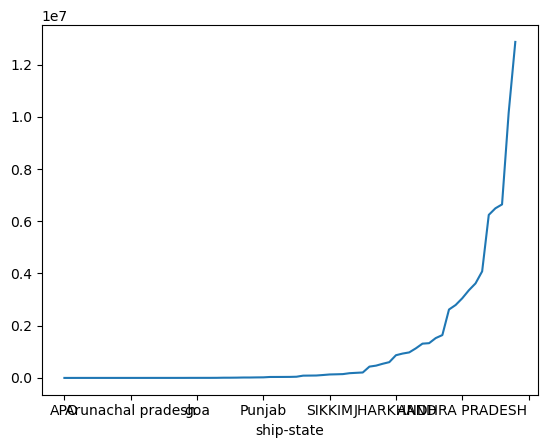

In [147]:
main.sort_values().plot()

In [17]:
df.head()

,index,Date,Status,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-country
1,1,04-30-22,Shipped - Delivered to Buyer,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,IN
2,2,04-30-22,Shipped,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,IN
4,4,04-30-22,Shipped,Top,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,IN
5,5,04-30-22,Shipped,Set,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,IN
6,6,04-30-22,Shipped,Set,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,IN


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_15428\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [19]:
df['Date']

1        2022-04-30
2        2022-04-30
4        2022-04-30
5        2022-04-30
6        2022-04-30
            ...    
128970   2022-05-31
128971   2022-05-31
128972   2022-05-31
128973   2022-05-31
128974   2022-05-31
Name: Date, Length: 122073, dtype: datetime64[ns]

In [35]:
Main = df.groupby('Category')['Amount'].sum().sort_values()

In [39]:
import matplotlib.pyplot as plt

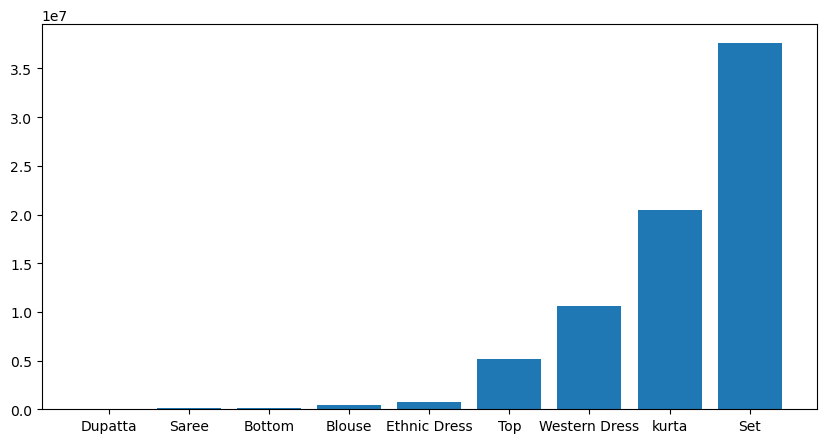

In [58]:
plt.figure(figsize = (10,5))
plt.bar(Main.index,Main.values)
plt.show()

In [66]:
main = df['Status'].value_counts()

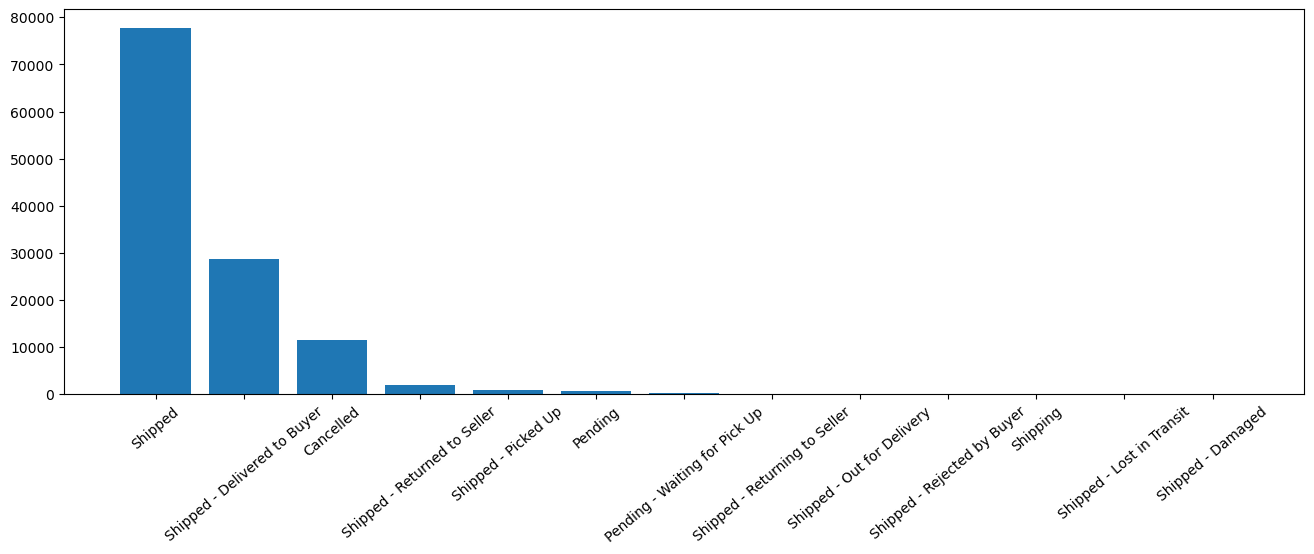

In [91]:
plt.figure(figsize = (16,5))
plt.bar(main.index, main.values)
plt.xticks(rotation=40)
plt.show()

In [97]:
main = df.groupby('Category')['Amount'].sum().sort_values()

In [99]:
main

Category
Dupatta               915.0
Saree              118509.0
Bottom             140226.0
Blouse             434751.0
Ethnic Dress       760711.0
Top               5202753.0
Western Dress    10628361.0
kurta            20445273.0
Set              37653476.0
Name: Amount, dtype: float64

In [103]:
main.values

array([9.1500000e+02, 1.1850900e+05, 1.4022600e+05, 4.3475100e+05,
       7.6071100e+05, 5.2027530e+06, 1.0628361e+07, 2.0445273e+07,
       3.7653476e+07])

In [105]:
main.index

Index(['Dupatta', 'Saree', 'Bottom', 'Blouse', 'Ethnic Dress', 'Top',
       'Western Dress', 'kurta', 'Set'],
      dtype='object', name='Category')

<BarContainer object of 9 artists>

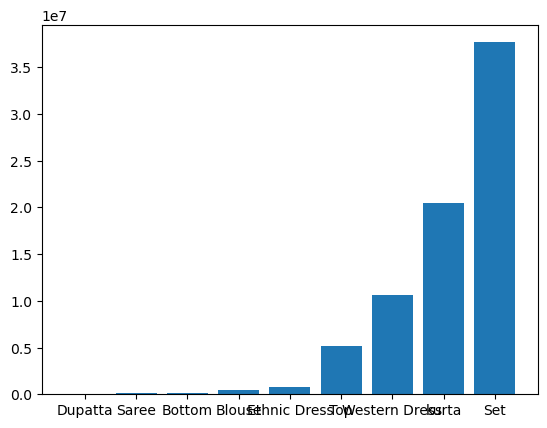

In [109]:
plt.bar(main.index,main.values)